In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
from shapely.geometry import Polygon
import pickle
import pylab as plt

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

root_path = "D:/GeoData/"
Main_CRS = "EPSG:27700"

Get Maps

In [2]:
def load_obj(name ):
    with open(root_path + 'WorkingData/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
ClippedMaps_5k = load_obj("ClippedMaps_5k")

In [4]:
ClippedMaps_5k.keys()

dict_keys(['Sydenham', 'Cumbria', 'Croydon', 'StPauls', 'ElephantCastle', 'M4_junct', 'M6_Junctions'])

In [5]:
ClippedMaps_5k["StPauls"].keys()

dict_keys(['All_GB', 'National_Parks', 'LocalAuthorities', 'LSOA', 'GreenSpace', 'Rivers', 'MotorwayJunctions', 'Motorway', 'A_Roads', 'B_Roads', 'Other_roads', 'NSPL_gdf', 'LandReg_gdf'])

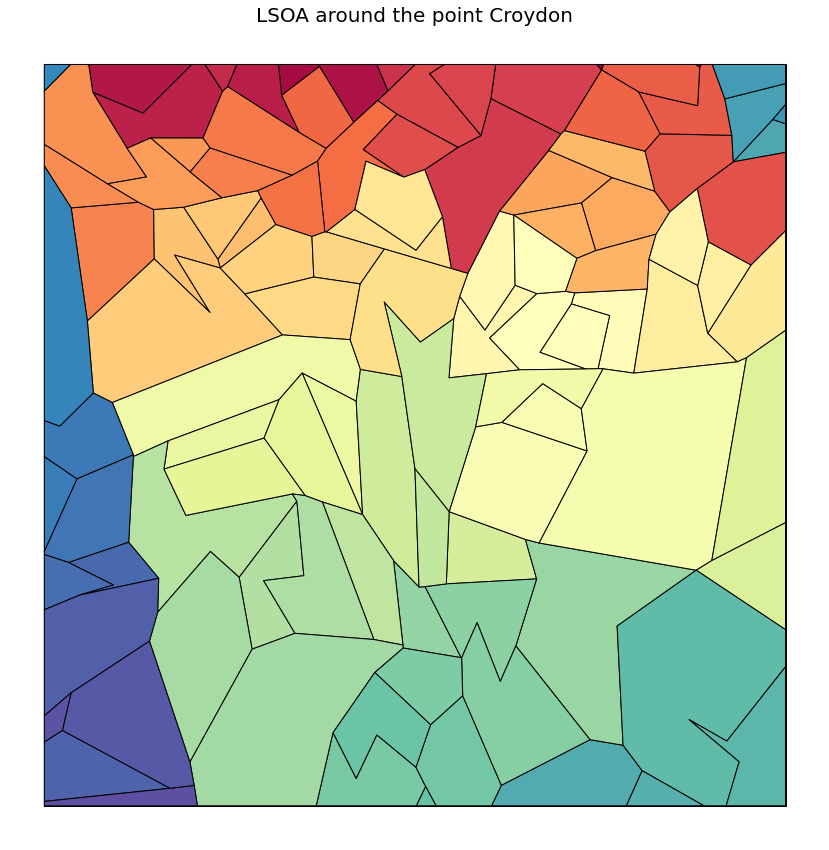

In [6]:
name = "Croydon"
Mapset = ClippedMaps_5k[name]

fig, ax = plt.subplots(1, figsize=(15,15))
Mapset['All_GB'].plot(ax=ax, color='white', edgecolor='black')
Mapset['LSOA'].plot(ax=ax, edgecolor='black', linewidth=1, column="LSOA11NM", cmap='Spectral',
                                categorical=True, legend=False)
ax.axis('off')
#plt.tight_layout()
ax.set_title('LSOA around the point '+ name,fontsize=20)
plt.savefig('Images/LSOA in' + name + '.png',dpi=300)

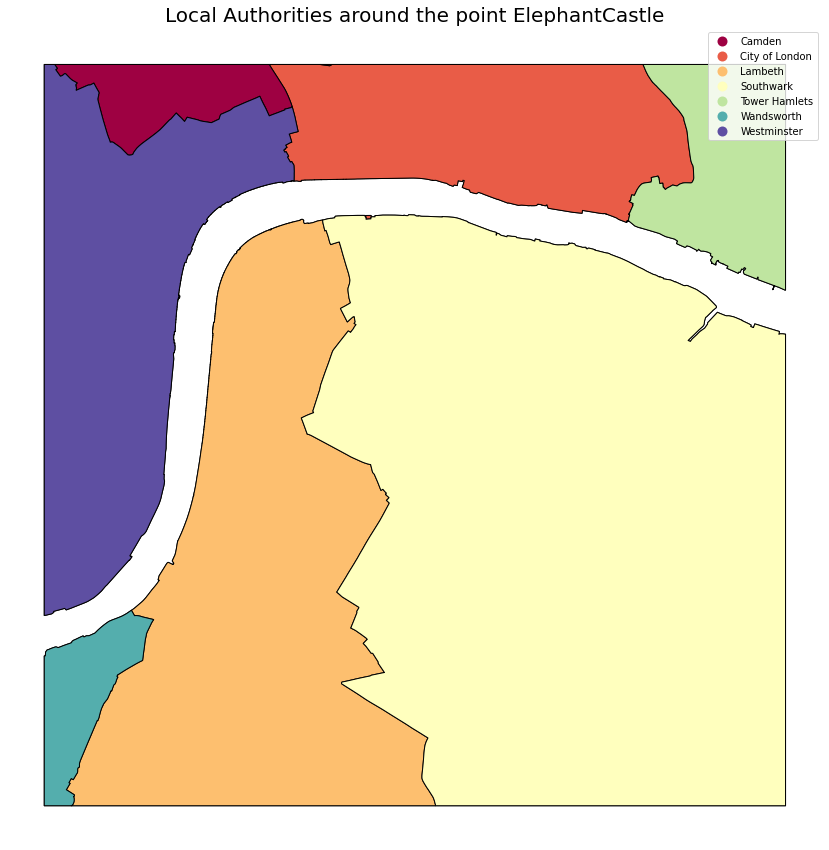

In [7]:
name = "ElephantCastle"
Mapset = ClippedMaps_5k[name]

fig, ax = plt.subplots(1, figsize=(15,15))
Mapset['All_GB'].plot(ax=ax, color='white', edgecolor='black')
Mapset['LocalAuthorities'].plot(ax=ax, edgecolor='black', linewidth=1, column="LAD20NM", cmap='Spectral',
                                categorical=True, legend=True)
ax.axis('off')
#plt.tight_layout()
ax.set_title('Local Authorities around the point '+ name,fontsize=20)
   
    
plt.savefig('Images/LocalAuthorities around' + name + '.png',dpi=300)

In [8]:
def printMap(name):
    Mapset = ClippedMaps_5k[name]
    fig, ax = plt.subplots(1, figsize=(15,15))
    Mapset['All_GB'].plot(ax=ax, color='white', edgecolor='teal')

    Mapset['Other_roads'].plot(ax=ax, color='black', linewidth=0.3)
    Mapset['Motorway'].plot(ax=ax, color='black', linewidth=3)
    Mapset['A_Roads'].plot(ax=ax, color='black', linewidth=2)
    Mapset['B_Roads'].plot(ax=ax, color='black', linewidth=1)
    Mapset['Rivers'].plot(ax=ax, color='blue', linewidth=0.2, alpha=1)
    Mapset['National_Parks'].plot(ax=ax, color='green', alpha=0.5)
    Mapset['GreenSpace'].plot(ax=ax, color='green', alpha=0.7)

    Mapset['LandReg_gdf'].plot(ax=ax, color='black', alpha=1, markersize=10)
    ax.axis('off')
    ax.set_title('Roads, Rivers and house sales around ' + name,fontsize=20)
    plt.savefig("Images/" + name + 'PrintMap.png',dpi=300)

In [9]:
def PrintSales(name):
    Mapset = ClippedMaps_5k[name]

    salecolour = "blue"

    fig, ax = plt.subplots(1, figsize=(15,15))
    Mapset['All_GB'].plot(ax=ax, color='white', edgecolor='black')
    Mapset['Other_roads'].plot(ax=ax, color='black', linewidth=0.3)
    Mapset['A_Roads'].plot(ax=ax, color='black', linewidth=2)
    Mapset['B_Roads'].plot(ax=ax, color='black', linewidth=1)
    Mapset['Motorway'].plot(ax=ax, color='black', linewidth=3)
    Mapset['LandReg_gdf'].plot(ax=ax, color=salecolour, alpha=1, markersize=Mapset['LandReg_gdf']['Price']/50000)

    ax.axis('off')
    #plt.tight_layout()
    ax.set_title('Property sales around '+ name,fontsize=20)

    l1 = plt.scatter([],[], s=2, edgecolors='none', color=salecolour)
    l2 = plt.scatter([],[], s=10, edgecolors='none', color=salecolour)
    l3 = plt.scatter([],[], s=20, edgecolors='none', color=salecolour)
    l4 = plt.scatter([],[], s=40, edgecolors='none', color=salecolour)
    labels = ["100k", "500k", "1M", "2M"]
    leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
    handlelength=2, loc = 8, borderpad = 1.8,
    handletextpad=1, scatterpoints = 1)

    plt.savefig('Images/Sales around ' + name + '.png',dpi=300)

C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\r

[('Sydenham', None),
 ('Cumbria', None),
 ('Croydon', None),
 ('StPauls', None),
 ('ElephantCastle', None),
 ('M4_junct', None),
 ('M6_Junctions', None)]

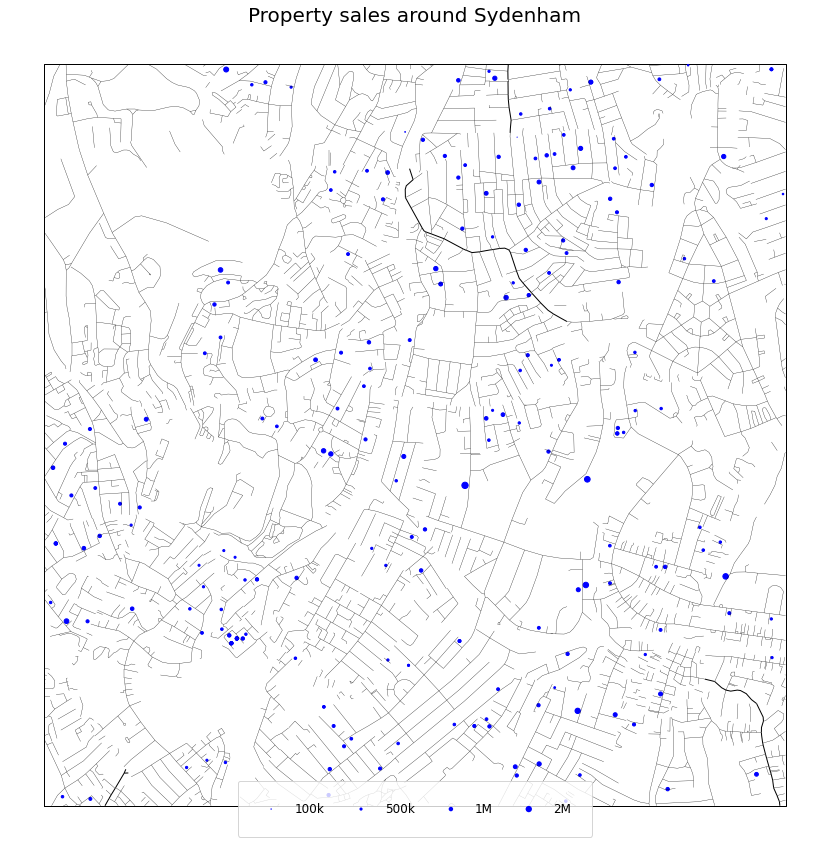

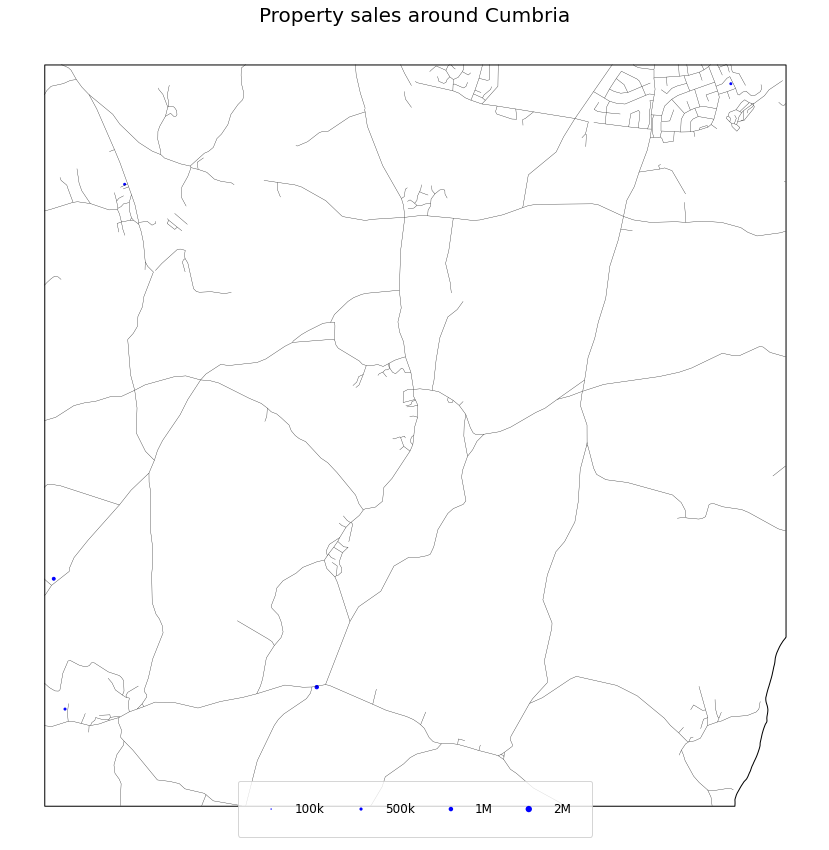

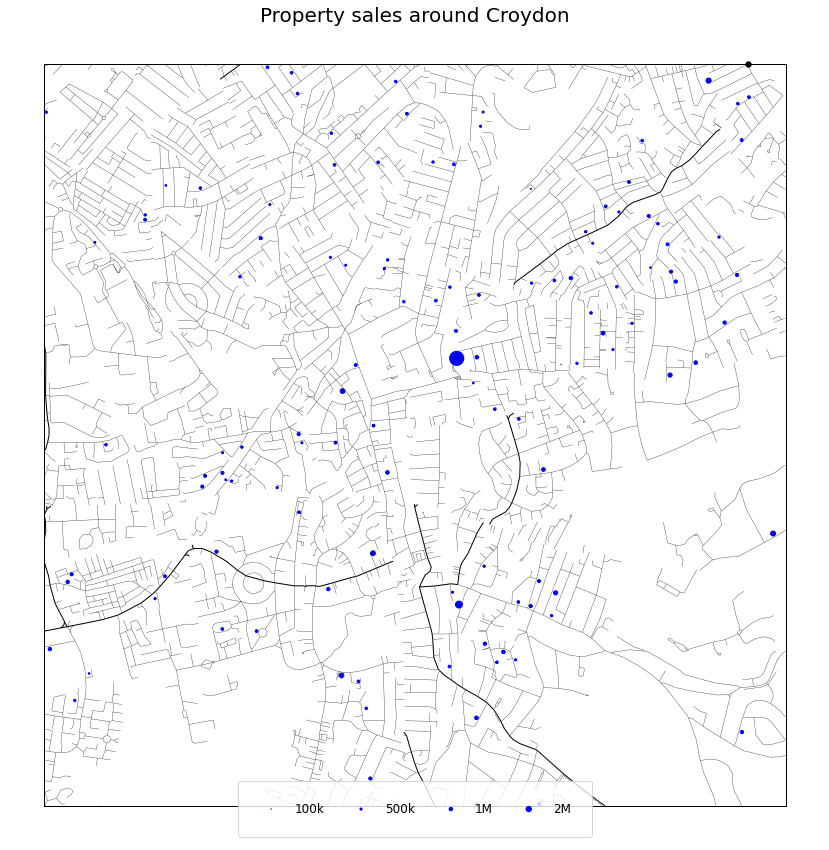

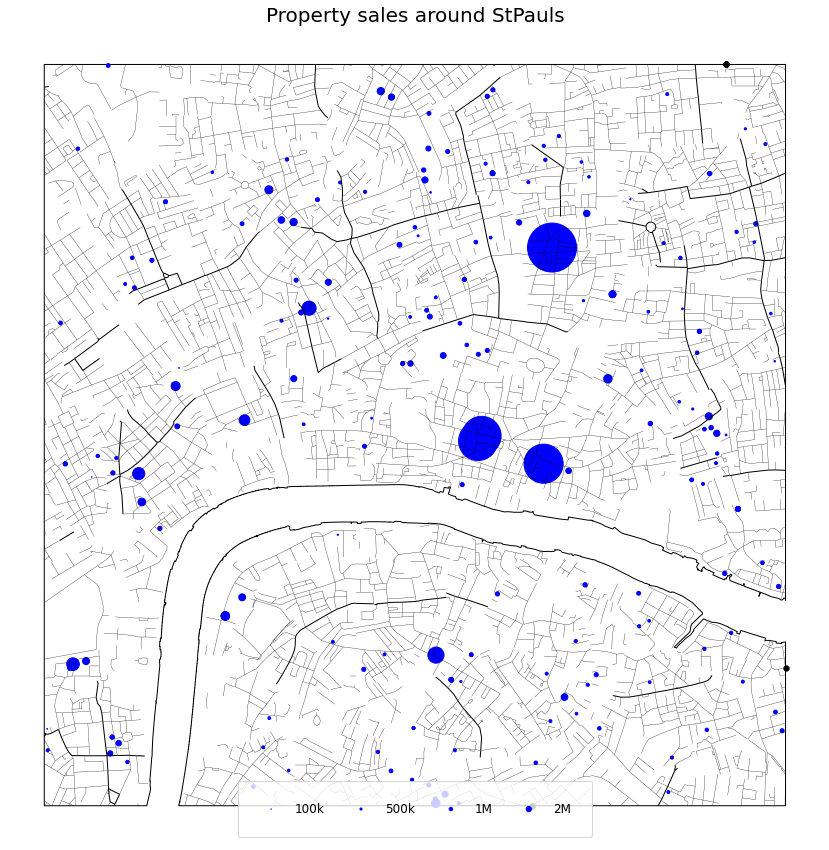

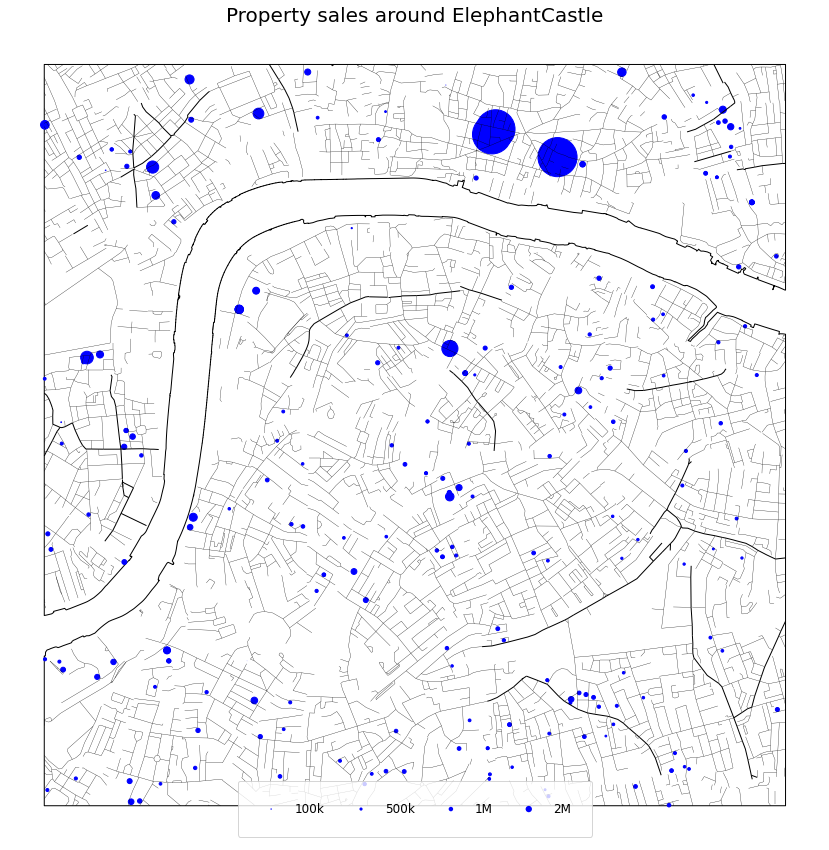

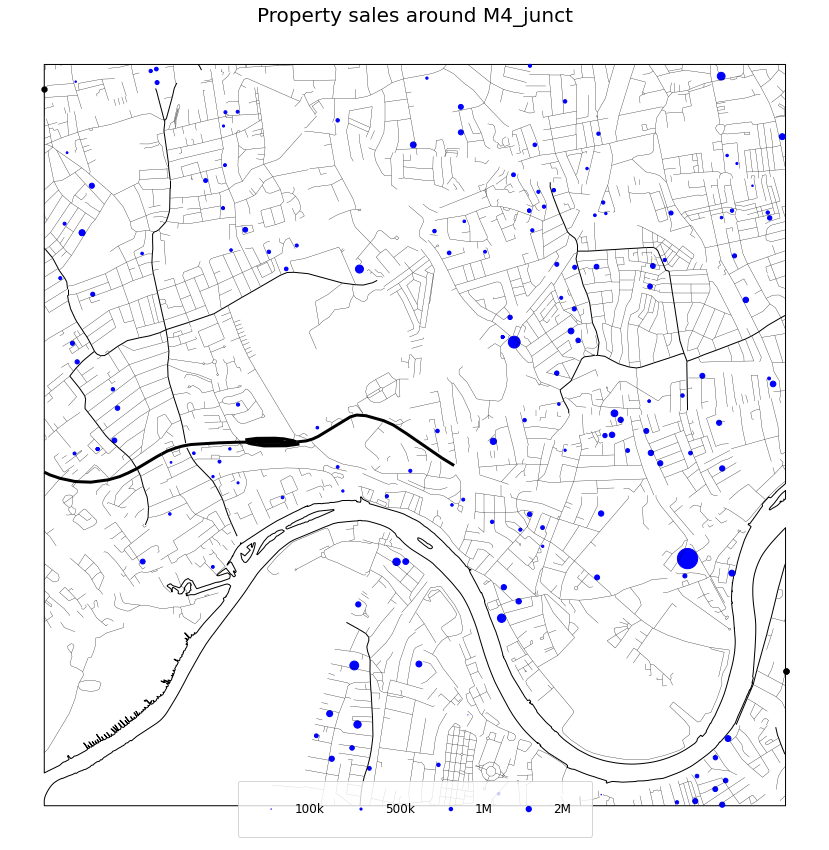

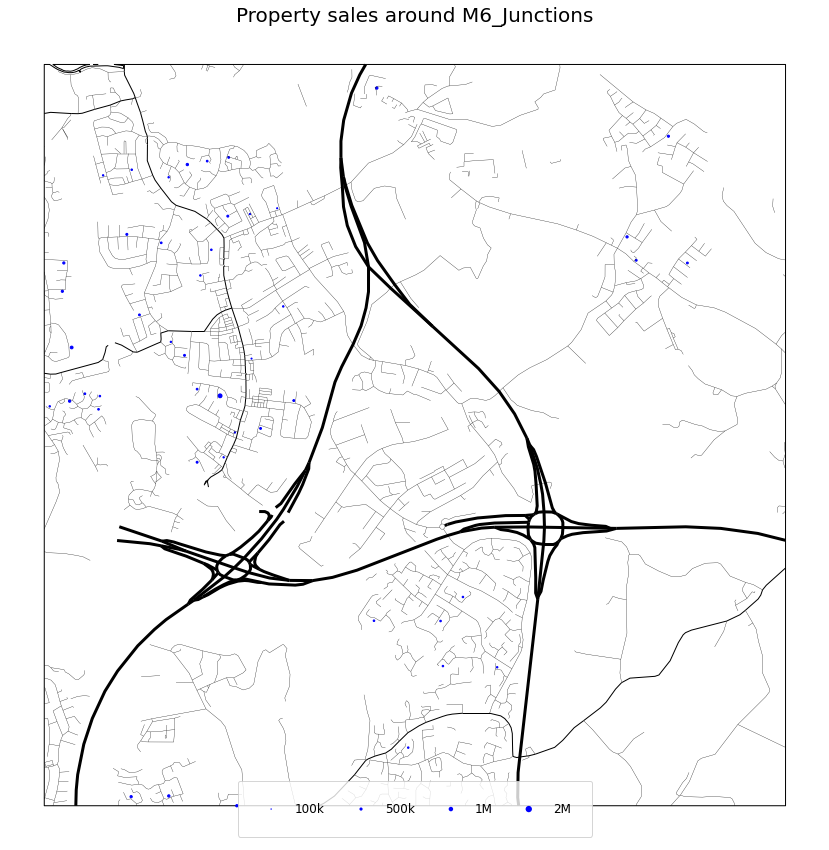

In [18]:
[(k, PrintSales(k)) for k, v in ClippedMaps_5k.items()]

C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\r

[('Sydenham', None),
 ('Cumbria', None),
 ('Croydon', None),
 ('StPauls', None),
 ('ElephantCastle', None),
 ('M4_junct', None),
 ('M6_Junctions', None)]

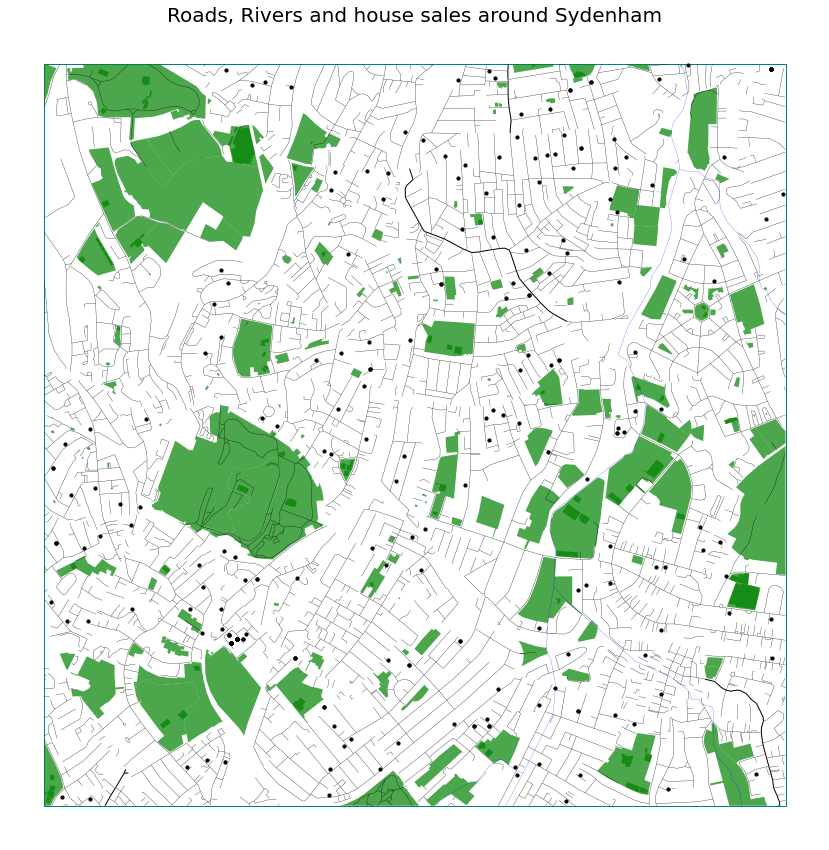

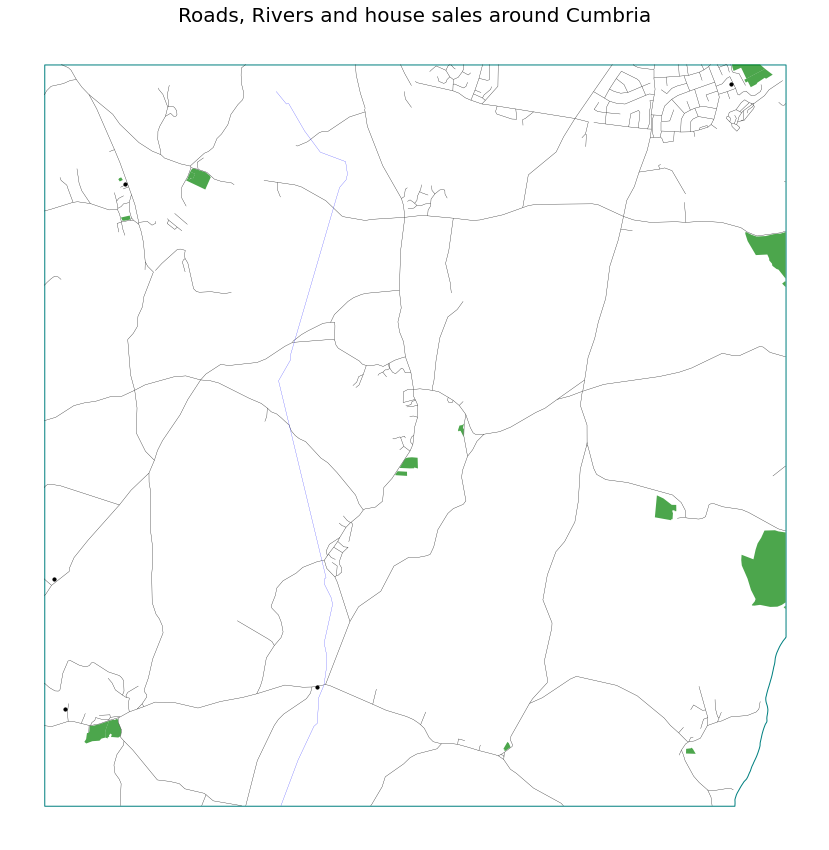

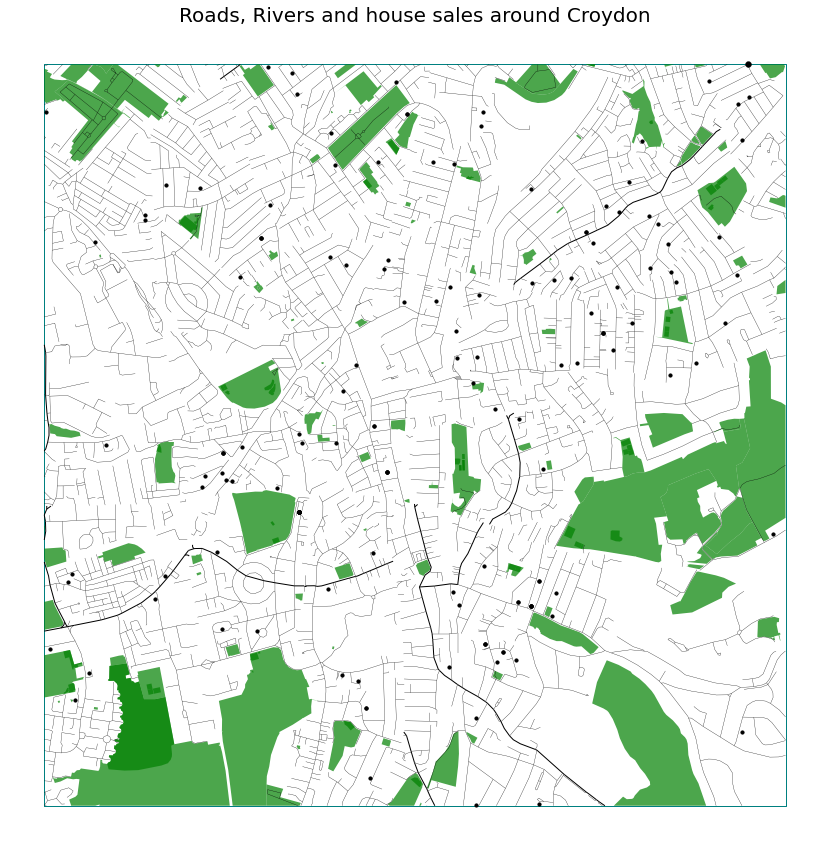

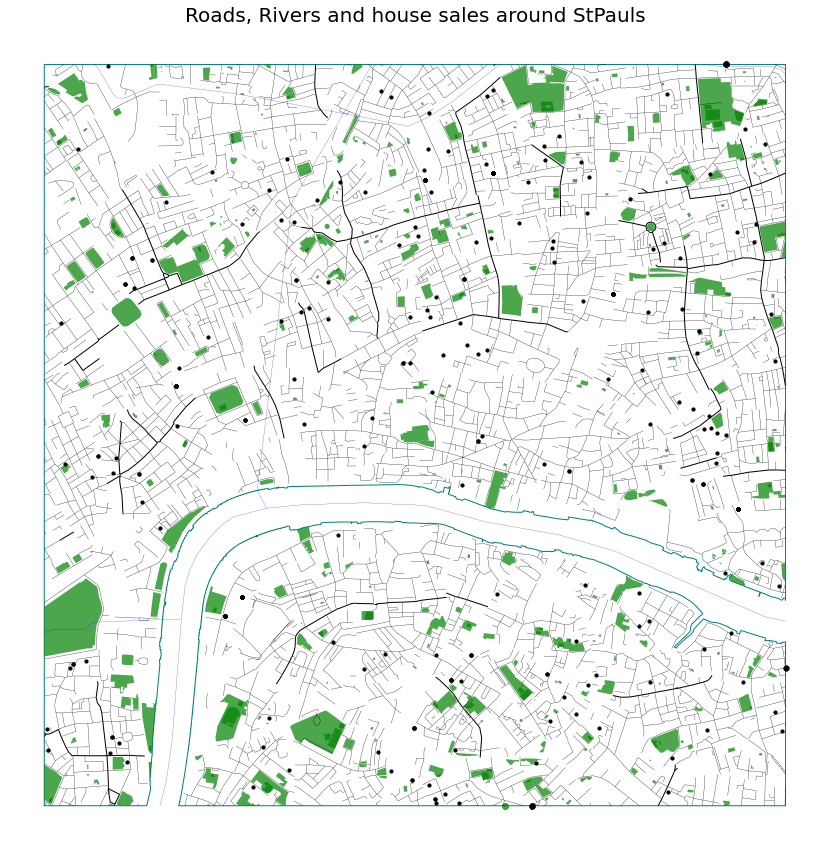

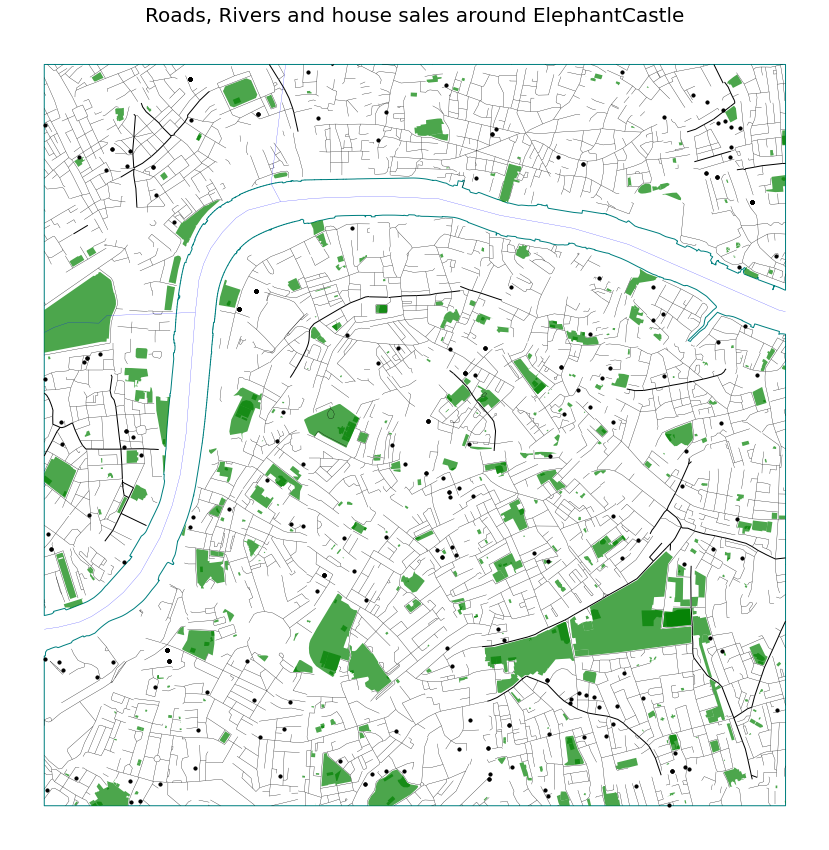

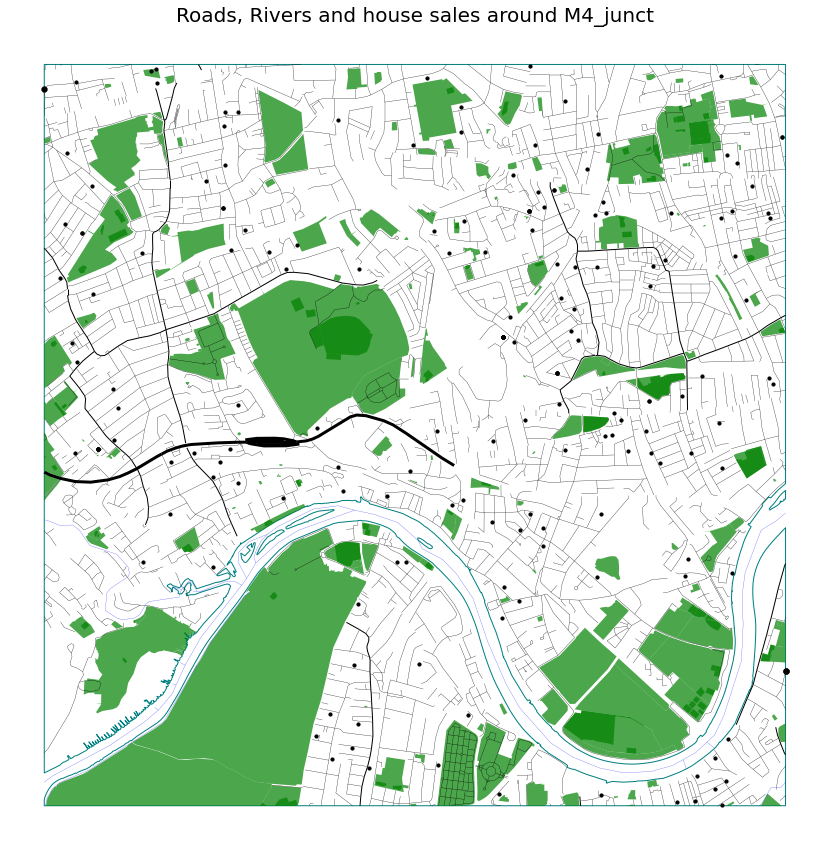

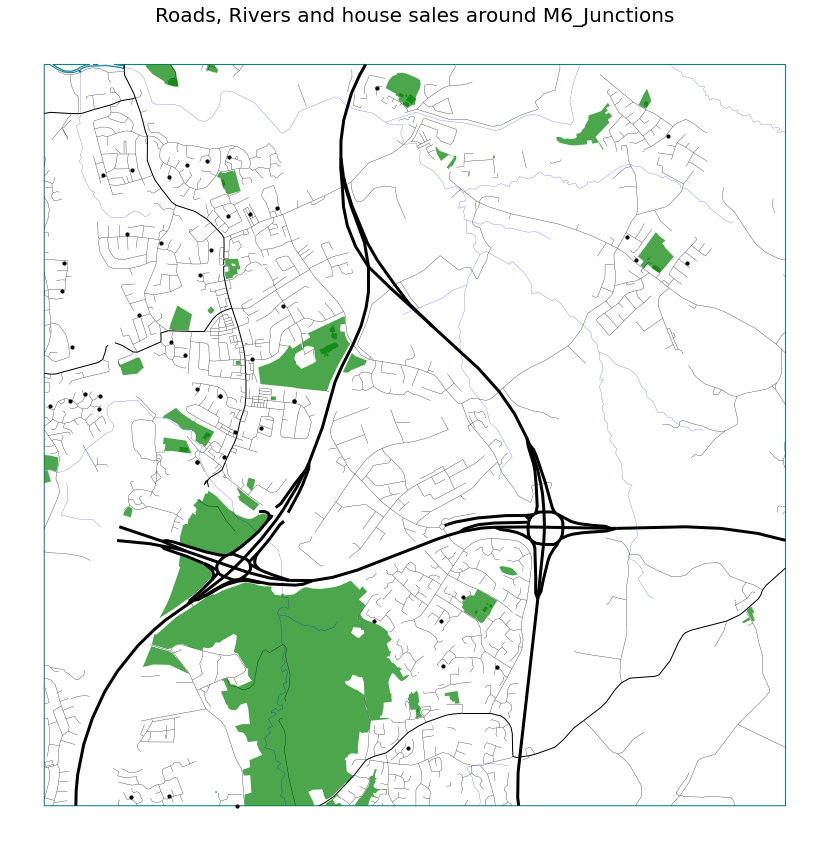

In [19]:
[(k, printMap(k)) for k, v in ClippedMaps_5k.items()]

Play with follium

In [11]:
KeyLocations = {'Sydenham' : [535493, 171250],
                'Cumbria' : [326877 , 474372],
                'Croydon' : [532621 , 165313],
                'StPauls' : [532052 , 181145],
                'ElephantCastle' : [531958 , 179077],
                'M4_junct' : [519377 , 178360],
                'M6_Junctions' : [357659 , 425462]}

KeyLocations_df = pd.DataFrame.from_dict(KeyLocations, orient='index', columns=["Easting", "Northing"], dtype=float)
KeyLocations_gdf = gpd.GeoDataFrame(KeyLocations_df, geometry=gpd.points_from_xy(KeyLocations_df.Easting, KeyLocations_df.Northing), crs=Main_CRS)
KeyLocations_gdf = KeyLocations_gdf.to_crs(epsg='4326')

In [16]:
name = "Sydenham"
Mapset = ClippedMaps_5k[name]


Lreg_json = Mapset['LandReg_gdf'].loc[:,["Price", 'geometry']].to_crs(epsg='4326').to_json()

centrepoint = [KeyLocations_gdf.loc[name,'geometry'].y,KeyLocations_gdf.loc[name,'geometry'].x]

mapa = folium.Map(centrepoint, 
                zoom_start = 13)

points = folium.features.GeoJson(Lreg_json)

mapa.add_child(points)

mapa

In [13]:
#Convert some of the maps to the right crs for folium and convert to geojsons
name = "Croydon"
Mapset = ClippedMaps_5k[name]

Lreg_fol = Mapset['LandReg_gdf'].loc[:,["Price", 'geometry']].to_crs(epsg='4326')
Lreg_json = Lreg_fol.to_json()
LSOA_fol = Mapset['LSOA'].loc[:,["LSOA11NM", 'Shape__Are', 'geometry']].to_crs(epsg='4326')
LSOA_json = LSOA_fol.to_json()

centrepoint = [KeyLocations_gdf.loc[name,'geometry'].y,KeyLocations_gdf.loc[name,'geometry'].x]

points = [Mapset['LandReg_gdf'].loc[:,'geometry'].y,Mapset['LandReg_gdf'].loc[:,'geometry'].x]

In [14]:
from folium.plugins import LocateControl

x1,y1,x2,y2 = Lreg_fol.loc[:,'geometry'].total_bounds
m = folium.Map(location=centrepoint)
LocateControl().add_to(m)
m.fit_bounds([[y1, x1], [y2, x2]])

marker_cluster = MarkerCluster(name='mc')
mc1= folium.plugins.FeatureGroupSubGroup(marker_cluster, 'SalesCluster')
m.add_child(marker_cluster)

mc1.add_child(folium.GeoJson(Lreg_fol,name='Sales',embed = False ,tooltip=folium.GeoJsonTooltip(fields=['Price']))).add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
#map.save('images/firstFolium.html')
m


* for each sale, get the distance to each motorway junction
* try making a raster map of distance to motorway junction and distance to A road
* make an interactive leaflet map


In [47]:
name="Sydenham"


Mapset = ClippedMaps_5k[name]

C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\richa\Anaconda3\envs\LandReg_py\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Text(0.5, 1.0, 'Roads, Rivers and house sales around Sydenham')

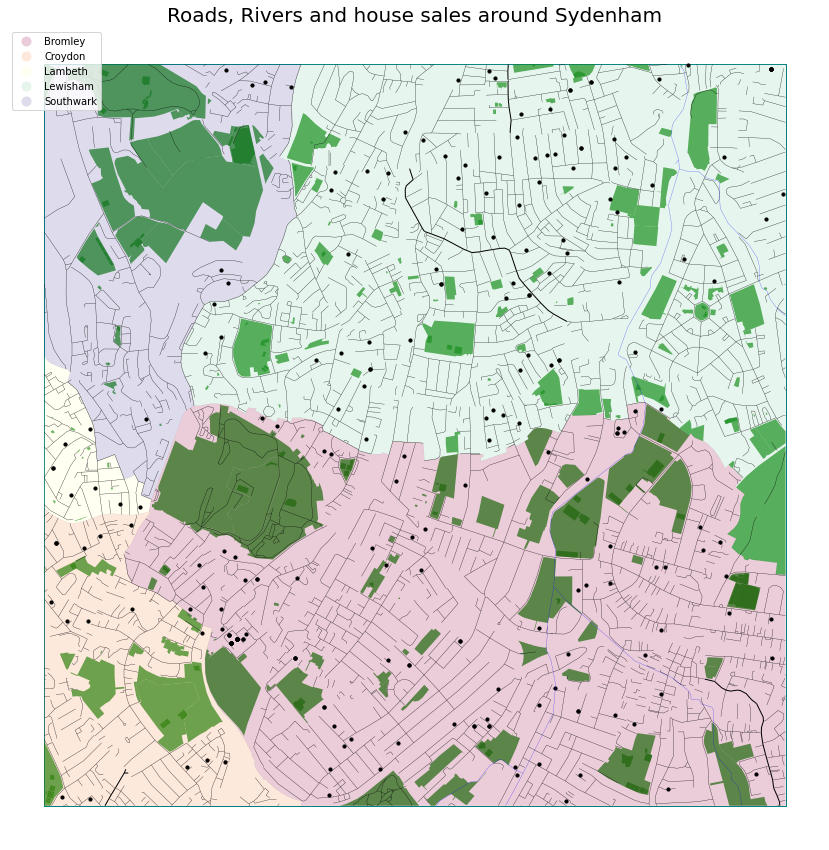

In [46]:
fig, ax = plt.subplots(1, figsize=(15,15))
Mapset['All_GB'].plot(ax=ax, color='white', edgecolor='teal')

Mapset['Other_roads'].plot(ax=ax, color='black', linewidth=0.3)
Mapset['Motorway'].plot(ax=ax, color='black', linewidth=3)
Mapset['A_Roads'].plot(ax=ax, color='black', linewidth=2)
Mapset['B_Roads'].plot(ax=ax, color='black', linewidth=1)
Mapset['Rivers'].plot(ax=ax, color='blue', linewidth=0.2, alpha=1)
Mapset['National_Parks'].plot(ax=ax, color='green', alpha=0.5)
Mapset['GreenSpace'].plot(ax=ax, color='green', alpha=0.7)
Mapset['LocalAuthorities'].plot(ax=ax, edgecolor='black', linewidth=0.1, column="LAD20NM", cmap='Spectral',
                                categorical=True, legend=True, alpha=0.2)

Mapset['LandReg_gdf'].plot(ax=ax, color='black', alpha=1, markersize=10)
ax.axis('off')
ax.set_title('Roads, Rivers and house sales around ' + name,fontsize=20)
#plt.savefig("Images/" + name + 'PrintMap.png',dpi=300)